# Differentiable acoustic simulations using `jwave`

Welcome to this advanced tutorial on acoustic wave simulation and optimization using jwave. This session will explore the integration of JAX's powerful automatic differentiation capabilities with acoustic modeling, opening up new avenues for research in wave physics and acoustic applications.
Our objectives for this tutorial are to:

1. Introduce the fundamentals of setting up and running acoustic simulations in jwave
2. Demonstrate the application of JAX's automatic differentiation to acoustic problems
3. Explore examples of applications in acoustic field optimization, sensitivity analysis and uncertainty quantification

By the end of this session, you will have gained hands-on experience with state-of-the-art tools for computational acoustics, preparing you for cutting-edge research in this field. 

Let's begin 🚀.

#### Preliminars

If you have not done it already, run the cell below to install all the required dependencies

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


Also, if you are on a machine with an NVIDIA GPU, install jax with GPU support (not needed if you are in colab)

In [2]:
!pip install jax[cuda12]


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## A primer on `jax`

### Introduction to JAX
JAX is a powerful library for high-performance numerical computing and machine learning research. It combines NumPy's familiar API with the benefits of automatic differentiation and accelerated computation on GPUs and TPUs.


### Key features of JAX:

1. **NumPy-like API**: Familiar syntax for NumPy users
2. **Automatic Differentiation**: Compute derivatives of any Python function
3. **Just-In-Time (JIT) compilation**: Optimize and compile your code for faster execution
4. **Vectorization**: Easily parallelize operations across multiple devices
5. **GPU/TPU support**: Seamlessly run computations on accelerated hardware

Let's start by importing JAX and checking its version:

In [3]:
import jax
import jax.numpy as jnp

print(f"JAX version: {jax.__version__}")
print(f"Available devices: {jax.devices()}")

JAX version: 0.4.33
Available devices: [CudaDevice(id=0)]


### Basic JAX Operations

JAX provides a NumPy-like interface through the `jax.numpy` module, which is typically imported as `jnp`. This allows users familiar with NumPy to transition easily to JAX while gaining access to its powerful features like automatic differentiation and JIT compilation.

In JAX, we create arrays using `jnp.array()` or other array creation functions. Let's look at some examples:

In [4]:
# Create a 1D array
a = jnp.array([1, 2, 3, 4, 5])
print("1D array:", a)

# Create a 2D array
b = jnp.array([[1, 2, 3], [4, 5, 6]])
print("2D array:\n", b)

# Create an array of zeros
c = jnp.zeros((3, 3))
print("Array of zeros:\n", c)

# Create an array of ones
d = jnp.ones((2, 2))
print("Array of ones:\n", d)

# Create an array with a range of values
e = jnp.arange(10)
print("Array with range:", e)

# Create a linearly spaced array
f = jnp.linspace(0, 1, 5)
print("Linearly spaced array:", f)

2024-09-18 18:40:07.731244: W external/xla/xla/service/gpu/nvptx_compiler.cc:893] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.6.68. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1D array: [1 2 3 4 5]
2D array:
 [[1 2 3]
 [4 5 6]]
Array of zeros:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Array of ones:
 [[1. 1.]
 [1. 1.]]
Array with range: [0 1 2 3 4 5 6 7 8 9]
Linearly spaced array: [0.   0.25 0.5  0.75 1.  ]


> *Note that unlike NumPy arrays, JAX arrays are immutable (more on this later). This means that once created, their values cannot be changed in-place.*

JAX supports a wide range of array operations, similar to NumPy. Here are some common operations:

In [5]:
a = jnp.array([1, 2, 3, 4, 5])
b = jnp.array([5, 4, 3, 2, 1]).astype(jnp.float32) # Can specify the data type!

# Addition
print("a + b =", a + b)

# Subtraction
print("a - b =", a - b)

# Multiplication
print("a * b =", a * b)

# Division
print("a / b =", a / b)

# Exponentiation
print("a ** 2 =", a ** 2)

a + b = [6. 6. 6. 6. 6.]
a - b = [-4. -2.  0.  2.  4.]
a * b = [5. 8. 9. 8. 5.]
a / b = [0.2 0.5 1.  2.  5. ]
a ** 2 = [ 1  4  9 16 25]


It also provides a variety of mathematical functions that operate on arrays, either elementwise or in aggregate. Here are some examples:

In [6]:
print("sin(a) =", jnp.sin(a))
print("sqrt(a) =", jnp.sqrt(a))

print("Mean of a:", jnp.mean(a))
print("Min of a:", jnp.min(a))
print("Standard deviation of a:", jnp.std(a))

sin(a) = [ 0.841471    0.90929747  0.14112    -0.7568025  -0.9589243 ]
sqrt(a) = [1.        1.4142135 1.7320508 2.        2.2360678]
Mean of a: 3.0
Min of a: 1
Standard deviation of a: 1.4142135


In [7]:
# Run this to import some required packages
from jwavetutorial import marking
import matplotlib.pyplot as plt

<div class="alert alert-info">

__📝 Exercise__

Try to write the code to create an array `x` containing the first 10 even numbers `[2, 4, 6, ..., 20]` and an array `y` containing the first 10 odd numbers `[1, 3, 5, ..., 19]`. Hint: Use <a href="https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.arange.html"><code>jax.numpy.arange</code></a> or <a href="https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.linspace.html"><code>jax.numpy.linspace</code></a>.
</div>

In [8]:
def create_arrays():
  # --- Add your code here ---
  x = ...
  y = ...
  # ---------------------------
  return x, y

# Verify the function
marking.verify_create_arrays(create_arrays)

Verifying...
Test PASSED 

Expecting:
[ 2  4  6  8 10 12 14 16 18 20]
[ 1  3  5  7  9 11 13 15 17 19]

Received:
[ 2  4  6  8 10 12 14 16 18 20]
[ 1  3  5  7  9 11 13 15 17 19]



Like `numpy`, JAX provides functions to manipulate arrays, such as reshaping, concatenation, and splitting:

In [9]:
# Reshape an array
g = jnp.arange(12).reshape(3, 4)
print("Reshaped array:\n", g)

# Transpose an array
print("Transposed array:\n", g.T)

# Flatten an array
print("Flattened array:", g.flatten())

# Concatenate arrays
h = jnp.concatenate([a, b])
print("Concatenated array:", h)

Reshaped array:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Transposed array:
 [[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]
Flattened array: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Concatenated array: [1. 2. 3. 4. 5. 5. 4. 3. 2. 1.]


Broadcasting is a powerful feature in JAX (and NumPy) that allows operations between arrays of different shapes. JAX will automatically broadcast arrays to compatible shapes when possible:

In [10]:
# Broadcasting example
i = jnp.array([1, 2, 3])
j = jnp.array([[1], [2], [3]])

print("i + j:\n", i + j)

i + j:
 [[2 3 4]
 [3 4 5]
 [4 5 6]]


In this example, `i` is broadcast to match the shape of `j`, allowing element-wise addition.

Finally, JAX arrays can be indexed and sliced similarly to NumPy arrays:

In [11]:
k = jnp.arange(10)

# Indexing
print("k[3] =", k[3])

# Slicing
print("k[2:5] =", k[2:5])
print("k[::2] =", k[::2])  # Every second element

# Boolean indexing
mask = k > 5
print("k[k > 5] =", k[mask])

k[3] = 3
k[2:5] = [2 3 4]
k[::2] = [0 2 4 6 8]
k[k > 5] = [6 7 8 9]


<div class="alert alert-info">

__📝 Exercise__

Try to write the code to create a 2D array containing the following 3x3 matrix:

$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{pmatrix}
$$

and then calculate both its matrix square and elementwise square

</div>

In [12]:
def matrix_exercise():
  # --- Add your code here ---
  matrix_square = ...
  matrix_elementwise_squared = ...
  # ---------------------------
  return matrix_square, matrix_elementwise_squared

# Verify the function
marking.verify_matrix_exercise(matrix_exercise)

Verifying...
Test PASSED 

Expecting:
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]

Received:
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]



#### The Catch: Immutability in JAX

One of the most important concepts to understand when working with JAX is that its arrays are immutable. This is a significant difference from NumPy arrays and can catch newcomers off guard. 

In JAX, once an array is created, its contents cannot be modified in-place. This means that operations that appear to modify an array actually create a new array with the modified values.

In [13]:
# Create a JAX array
x = jnp.array([1, 2, 3, 4, 5])

# Attempt to modify the array in place
# x[0] = 10  # This will raise an error

If you run this code, you'll get a `TypeError` with a message like `"JAX arrays are immutable; use x.at[idx].set(val) instead"`0.

Instead of in-place modifications, JAX provides functional update operations. Here's how you can achieve the same result:

In [14]:
# Correct way to update a JAX array
y = x.at[0].set(10)
print("Original x:", x)
print("New array y:", y)

Original x: [1 2 3 4 5]
New array y: [10  2  3  4  5]


In this example, x remains unchanged, and a new array y is created with the updated value.

##### Implications for Your Code

1. **No In-Place Operations**: Operations like `+=`, `-=`, etc., which modify arrays in-place in NumPy, create new arrays in JAX.

2. **Functional Programming Style**: JAX encourages a more functional programming style, where you create new arrays instead of modifying existing ones.

3. **Memory Usage**: Be aware that operations on large arrays will create new arrays, which can impact memory usage.

4. **Performance Considerations**: Despite creating new arrays, JAX is optimized for these operations and can often perform them efficiently, especially when using JIT compilation (more on this soon)

Here's an example of updating multiple elements in a JAX array:

In [15]:
# Create a 2D JAX array
matrix = jnp.arange(9).reshape(3, 3)
print("Original matrix:\n", matrix)

# Update multiple elements
new_matrix = matrix.at[0, :].set(jnp.array([10, 20, 30]))
print("Updated matrix:\n", new_matrix)

Original matrix:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
Updated matrix:
 [[10 20 30]
 [ 3  4  5]
 [ 6  7  8]]


In general, to get the most out of JAX, it's important to write code that aligns with JAX's functional programming paradigm. In particular, JAX works best with pure functions - functions that always produce the same output for a given input and don't have side effects:

In [16]:
# Good: Pure function
def add_numbers(a, b):
  return a + b

# Bad: Impure function (avoid)
total = 0
def add_to_total(x):
  global total
  total += x
  return total
  
print("Calling twice a pure function:")
print(add_numbers(1, 2))
print(add_numbers(1, 2))

print("Calling twice an impure function. Note that the result is different:")
print(add_to_total(1))
print(add_to_total(1))

Calling twice a pure function:
3
3
Calling twice an impure function. Note that the result is different:
1
2


<div class="alert alert-info">

__📝 Exercise__

Create a 2D array `z` with shape `(5,2)` containing the numbers 1 to 10. Then, change the number corresponding to even-indexed row to -1. 

*Remember: differently from MATLAB, Python uses 0-based indexing.*

</div>

In [17]:
def array_2d_exercise():
  # --- Add your code here ---
  matrix = ...
  matrix_modified = ...
  # ---------------------------
  return matrix, matrix_modified

# Verify the function0
marking.verify_array_2d_exercise(array_2d_exercise)

Verifying...
Test PASSED 

Expecting:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
[[-1 -1]
 [ 3  4]
 [-1 -1]
 [ 7  8]
 [-1 -1]]

Received:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
[[-1 -1]
 [ 3  4]
 [-1 -1]
 [ 7  8]
 [-1 -1]]



After completing this section, you'll have a solid foundation in basic JAX operations and how to work with JAX's immutable arrays, which is crucial for writing correct and efficient JAX code. Immutability often leads to cleaner, more predictable code, especially in complex scientific computations where keeping track of state changes can be challenging. 

Like everything, the key to mastering JAX is practice. Don't hesitate to experiment with different array shapes, operations, and functions. The more you practice, the more comfortable you'll become with JAX's powerful features.

### Just-In-Time (JIT) Compilation in JAX

Just-In-Time (JIT) compilation is a powerful feature in JAX that can significantly speed up your code. JIT compilation works by translating your Python functions into optimized machine code at runtime, just before the function is executed. This can lead to substantial performance improvements, especially for numerical computations and when running on accelerated hardware like GPUs or TPUs.

The primary benefits of JIT compilation in JAX include:

1. Improved execution speed
2. Reduced Python overhead
3. Better utilization of hardware resources

To use JIT compilation in JAX, you simply need to apply the `jax.jit` decorator to your function. Here's a basic example:

In [18]:
import jax
import jax.numpy as jnp

# Define a function
def slow_f(x):
    return x * 2

# JIT-compile the function
fast_f = jax.jit(slow_f)

# Use the JIT-compiled function
x = jnp.array([1, 2, 3, 4])
result = fast_f(x)
print(result)  # Output: [2 4 6 8]

[2 4 6 8]


You can also use `jit` as a decorator:

In [19]:
@jax.jit
def fast_g(x):
    return x * 2

result = fast_g(x)
print(result)  # Output: [2 4 6 8]

[2 4 6 8]


Here's a more complex example of using JIT compilation to speed up a Monte Carlo estimation of π:

In [73]:
# Define the function
def monte_carlo_pi(n_points):
    # Generate random points
    key = jax.random.PRNGKey(42)
    points = jax.random.uniform(key, (n_points, 2), minval=-1, maxval=1)
    
    # Check if points are inside the unit circle
    inside_circle = (points ** 2).sum(axis=1) <= 1
    
    # Estimate pi
    pi_estimate = 4 * jnp.mean(inside_circle)
    
    return pi_estimate
  
# JIT-compiled version
jit_monte_carlo_pi = jax.jit(monte_carlo_pi, static_argnums=(0,))

In [74]:
from jwavetutorial import benchmark

# Checking speedup
n_points_list = [100_0000, 1_000_0000,  10_000_0000]
benchmark.mc_pi_speed_comparison(monte_carlo_pi, jit_monte_carlo_pi, n_points_list)


Non-JIT vs JIT Monte Carlo Pi Estimation:
-----------------------------------------------------------
 n_points | Non-JIT Time | JIT Time | Speedup | Pi Estimate
-----------------------------------------------------------
  1000000 | 0.008557s | 0.004790s | 1.79x | 3.143196
 10000000 | 0.069819s | 0.025543s | 2.73x | 3.142342
100000000 | 0.357664s | 0.055640s | 6.43x | 3.141528
-----------------------------------------------------------
True value of pi: 3.141593


##### When to Use JIT

JIT compilation is most beneficial for functions that:

1. Perform complex numerical computations
2. Are called multiple times with inputs of the same shape and dtype
3. Don't rely heavily on Python control flow (e.g., if statements, for loops)

However, there's a compilation overhead when a JIT-compiled function is first called or when it's called with new input shapes. For very simple or rarely called functions, this overhead might outweigh the benefits.


Sometimes, you might want to JIT-compile a function but keep some arguments static (not traced or specialized). You can do this using `static_argnums` or `static_argnames`:

##### JIT and Random Numbers

When using random numbers with JIT-compiled functions, you need to be careful about how you handle the random state. JAX uses a functional random number generation system, where you explicitly pass and return PRNG keys:

In [22]:
import jax.random as random

@jax.jit
def f(key, x):
    return x + random.normal(key, x.shape)

key = random.PRNGKey(0)
x = jnp.array([1.0, 2.0, 3.0])
result = f(key, x)
print(result)

[2.8160863 1.5173769 3.339889 ]


#### Common Pitfalls and Best Practices

1. **Python Control Flow**: JIT works best with JAX's control flow primitives (`lax.cond`, `lax.while_loop`, etc.) rather than Python control flow.

2. **In-place Updates**: Remember that JAX arrays are immutable. In-place updates in JIT-compiled functions won't work as expected.

3. **Non-JAX Operations**: JIT-compiled functions should primarily use JAX operations. NumPy operations or other Python functions might not be compatible.

4. **Reshaping**: Be cautious about reshaping arrays inside JIT-compiled functions, as this can lead to recompilation.

5. **Precision**: JIT compilation might change the order of operations, which can lead to small numerical differences. Use `jax.config.update('jax_enable_x64', True)` if you need higher precision.

<div class="alert alert-info">

__📝 Exercise__

Write a function that computes the mean squared error between two arrays:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

 JIT-compile this function and compare its performance with the non-JIT version.

</div>

In [23]:
# --- Add your code here ---
def mse(y_true, y_pred):
    ...
  
jit_mse = ...
# ---------------------------

marking.verify_mse(mse)
marking.verify_mse(jit_mse)

Verifying...
Test PASSED 

Expecting:
0.4

Received:
0.4

Verifying...
Test PASSED 

Expecting:
0.4

Received:
0.4



### Automatic Differentiation in JAX

#### Introduction to Automatic Differentiation

Automatic differentiation (AD) is a key feature of JAX, allowing you to compute derivatives of functions efficiently and accurately. This is crucial for many applications in scientific computing, optimization, and machine learning. JAX's AD system can compute gradients, Jacobians, and even higher-order derivatives with ease.

The main benefits of automatic differentiation are:

1. Efficiency: Computes derivatives faster than numerical differentiation methods
2. Accuracy: Provides exact derivatives (up to floating-point precision)
3. Flexibility: Works with complex functions and supports higher-order derivatives
4. Ease of use: Simple API for computing various types of derivatives

#### Computing Gradients with `jax.grad`

The most common use of automatic differentiation is computing gradients. In JAX, this is done using the `jax.grad` function. This easier to understand with an example.

Assume we have the function

$$
f(x) = x^2
$$

The derivative of this function with respect to $x$ is

$$
\frac{df}{dx} = 2x
$$

Let's compute this derivative using `jax.grad`:

In [24]:
import jax
import jax.numpy as jnp

def f(x):
    return x ** 2

df = jax.grad(f)

x = 3.0
print(f"f({x}) = {f(x)}")  # Output: f(3.0) = 9.0
print(f"f'({x}) = {df(x)}")  # Output: f'(3.0) = 6.0

f(3.0) = 9.0
f'(3.0) = 6.0


As you can see, `grad` returns a function that is exactly $df/dx = 2x$. You can then evaluate this function at any value of $x$ to get the derivative at that point. 

The important thing to remember is that, like `jit`, the `grad` function __takes a function as input and returns a new function as output__. 

Let's visualize this with the function

$$
f(x) = \sin(x), \quad \frac{df}{dx} = \cos(x)
$$

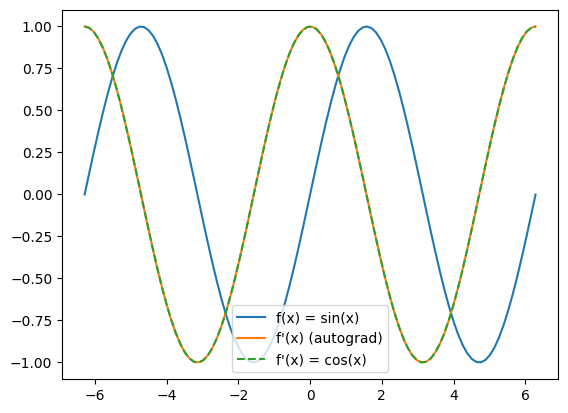

In [25]:
def f(x):
    return jnp.sin(x)
  
df = jax.grad(f) # Compute the gradient of f
df_exact = jnp.cos # Exact derivative of f

# Plotting
x = jnp.linspace(-2*jnp.pi, 2*jnp.pi, 100)
y = f(x)
y_exact = df_exact(x)
y_autograd = jax.vmap(df)(x)

plt.plot(x, y, label="f(x) = sin(x)")
plt.plot(x, y_autograd, label="f'(x) (autograd)")
plt.plot(x, y_exact, label="f'(x) = cos(x)", linestyle="--")
plt.legend()

For functions with multiple inputs, `grad` computes the gradient with respect to the first argument by default:

In [26]:
def f(x, y):
    return x ** 2 + y ** 3

df_dx = jax.grad(f)
df_dy = jax.grad(f, argnums=1) # Compute the gradient with respect to the second argument, remember Python is 0-indexed

x, y = 2.0, 3.0
print(f"∂f/∂x at (2, 3) = {df_dx(x, y)}")
print(f"∂f/∂y at (2, 3) = {df_dy(x, y)}")

∂f/∂x at (2, 3) = 4.0
∂f/∂y at (2, 3) = 27.0


<div class="alert alert-info">

__📝 Exercise__

1. Write a function that computes the Rosenbrock function

$$
f(x, y) = (1 - x)^2 + 100(y - x^2)^2
$$

2. Use `jax.grad` to compute the gradient of this function with respect to x and y
3. Evaluate the gradient at the points `(0, 0)`, `(1, 1)`, and `(2, 4)`

</div>

In [27]:
# --- Add your code here ---
def f(p):
  """p is a 1D array of length 2, representing a point in 2D space."""
  ...

grad_0_0 = ...
grad_1_1 = ...
grad_2_3 = ...
# ---------------------------

marking.verify_rosenbrock(jnp.array([0., 0.]), grad_0_0)
marking.verify_rosenbrock(jnp.array([1., 1.]), grad_1_1)
marking.verify_rosenbrock(jnp.array([2., 3.]), grad_2_3)

Verifying...
Test PASSED 

Expecting:
[-2.  0.]

Received:
[-2.  0.]

Verifying...
Test PASSED 

Expecting:
[0. 0.]

Received:
[0. 0.]

Verifying...
Test PASSED 

Expecting:
[ 802. -200.]

Received:
[ 802. -200.]



#### Higher-order gradients

JAX also provides functions to compute Jacobians (`jacfwd` and `jacrev`):

$$
J_{f}(x) = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
... & ... & ... & ... \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n} \\
\end{bmatrix} \in \mathbb{R}^{m \times n}
$$

In [28]:
def f(x):
    return jnp.array([x[0] ** 2, x[1] ** 3, x[0] * x[1]])

x = jnp.array([2.0, 3.0])

# Forward-mode Jacobian
J_fwd = jax.jacfwd(f)(x)
print("Forward-mode Jacobian:")
print(J_fwd)

# Reverse-mode Jacobian
J_rev = jax.jacrev(f)(x)
print("Reverse-mode Jacobian:")
print(J_rev)

Forward-mode Jacobian:
[[ 4.  0.]
 [ 0. 27.]
 [ 3.  2.]]
Reverse-mode Jacobian:
[[ 4.  0.]
 [ 0. 27.]
 [ 3.  2.]]


The choice between `jacfwd` and `jacrev` depends on the dimensions of the input and output. Generally, `jacrev` is more efficient when the output dimension is smaller than or equal to the input dimension, and `jacfwd` is more efficient otherwise.

You can compute even higher-order derivatives by applying `grad` multiple times:

In [29]:
def f(x):
    return x ** 4

# Third-order derivative
d3f_dx3 = jax.grad(jax.grad(jax.grad(f)))

x = 2.0
print(f"f'''({x}) = {d3f_dx3(x)}")

f'''(2.0) = 48.0


<div class="alert alert-info">

__📝 Exercise__

1. Write a function that computes the Cartesian coordinates $(x, y, z)$ from spherical coordinates $(r, \theta, \phi)$ 
2. Compute the Jacobian of this function in $(1.0, 0.5, 0.25)$

</div>

In [30]:
def cartesian_to_spherical(rθφ):
    """rθφ is a 1D array of length 3, representing spherical coordinates.
    
    The function should return a 1D array of length 3, representing Cartesian coordinates.
    """
    # --- Add your code here ---
    ...
    # --------------------------
    return xyz
    
# Compute Jacobians
# --- Add your code here ---
J = jax.jacfwd(cartesian_to_spherical)(jnp.array([1.0, 0.5, 0.25]))
# --------------------------

marking.verify_sphere_to_cart(J)

Verifying...
Test PASSED 

Expecting:
[[ 0.46452138  0.8503006  -0.11861178]
 [ 0.11861178  0.2171174   0.46452138]
 [ 0.87758255 -0.47942555  0.        ]]

Received:
[[ 0.46452138  0.8503006  -0.11861178]
 [ 0.11861178  0.2171174   0.46452138]
 [ 0.87758255 -0.47942555  0.        ]]



For a more in-depth look at automatic differentiation in JAX, check out the [Automatic differentiation](https://jax.readthedocs.io/en/latest/automatic-differentiation.html#automatic-differentiation) section of the JAX documentation.

### Optimization with Automatic Differentiation and `optax`

In this section, we'll explore how to use JAX's automatic differentiation capabilities in conjunction with the Optax library to solve a simple optimization problem. We'll use gradient descent to find the minimum of a function, demonstrating the power of combining these tools for efficient optimization.

Optax is a gradient processing and optimization library for JAX. It provides a wide range of optimization algorithms and is designed to be flexible and composable. In this example, we'll use a basic gradient descent optimizer, but Optax supports many more advanced algorithms.

In [31]:
import optax

Let's consider a simple 2D optimization problem: finding the minimum of the Himmelblau function. This function is often used as a test problem for optimization algorithms because it has multiple local minima.

The Himmelblau function is defined as:

$$
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$

Let's implement this function in JAX:

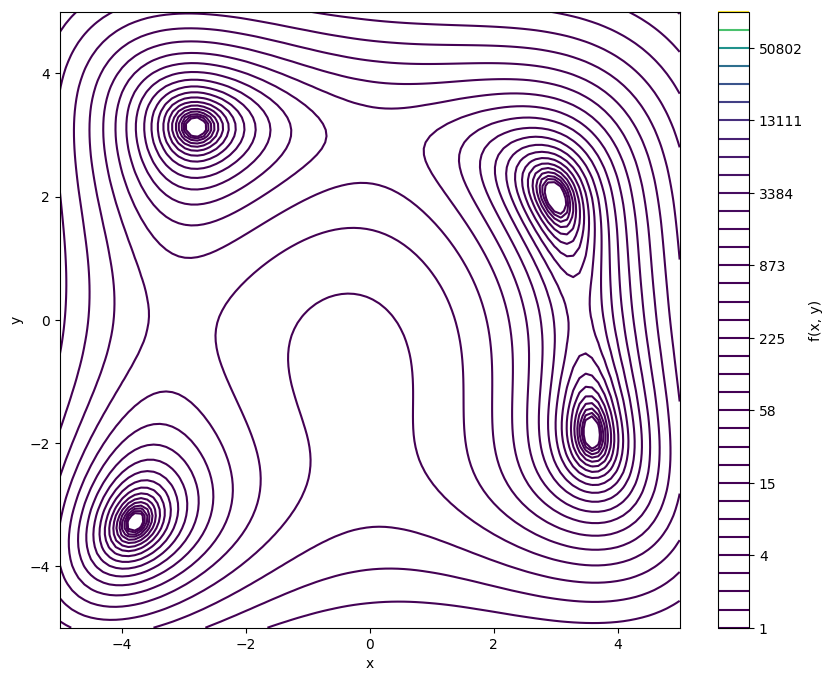

In [32]:
from jwavetutorial import visualize

def himmelblau(xy):
    x, y = xy
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Plot the function
visualize.visualize_2d_function(himmelblau)

Now, let's use JAX's automatic differentiation and Optax to implement gradient descent for finding the minimum of the Himmelblau function.

First of all, let's get the gradient of the function

In [33]:
grad_himmelblau = jax.grad(himmelblau)

We will use the `optax` library to implement the gradient descent optimizer. Gradient descent is a simple optimization algorithm that updates the parameters in the direction of the negative gradient:

$$
\theta_{t+1} = \theta_t - \alpha \nabla f(\theta_t)
$$

where $\theta$ is the parameter vector, $\alpha$ is the learning rate, and $\nabla f(\theta)$ is the gradient of the function with respect to the parameters. We will use Adam, which is a more advanced variant of gradient descent that adapts the learning rate for each parameter.

In [34]:
# Set up the optimizer
learning_rate = 0.01
optimizer = optax.adam(learning_rate)

At this point, we need to define the initial parameters and initialize the optimizer

In [35]:
# Initialize the parameters
xy_0 = jnp.array([-0., 0.])  

# Initialize the optimizer state
opt_state = optimizer.init(xy_0)

Lastly, we need to define what is a single optimization step for gradient descent. This is done by:
1. Computing the gradient of the function at the current parameters. Here we will the `value_and_grad` function, a variation of `grad`, to compute both the value and the gradient at the same time.
2. Applying the optimizer to update the parameters

Note that we are compiling this entire optimization step using `jit` to speed up the computation.

In [36]:
# Define a single optimization step
@jax.jit
def optimization_step(params, opt_state):
  # Compute the loss and the gradients
  loss, grads = jax.value_and_grad(himmelblau)(params)
  
  # Update the parameters
  updates, opt_state = optimizer.update(grads, opt_state)
  params = optax.apply_updates(params, updates)
  
  # Return the updated parameters, optimizer state, and loss
  return params, opt_state, loss

Now, we just need to apply this optimization step multiple times to find the minimum of the Himmelblau function:

In [37]:
# Run the optimization
num_steps = 500
trajectory = [xy_0]  # Store the trajectory of the optimization for visualization
losses = []

for _ in range(num_steps):
  # Perform a single optimization step
  xy, opt_state, loss = optimization_step(trajectory[-1], opt_state)
  
  # Store the updated parameters for later visualization
  trajectory.append(xy)
  losses.append(loss)
  
# Display results
print(f"Optimized parameters: {xy}")
print(f"Minimum value found: {himmelblau(xy)}")

Optimized parameters: [2.9948387 2.0099766]
Minimum value found: 0.0016536808107048273


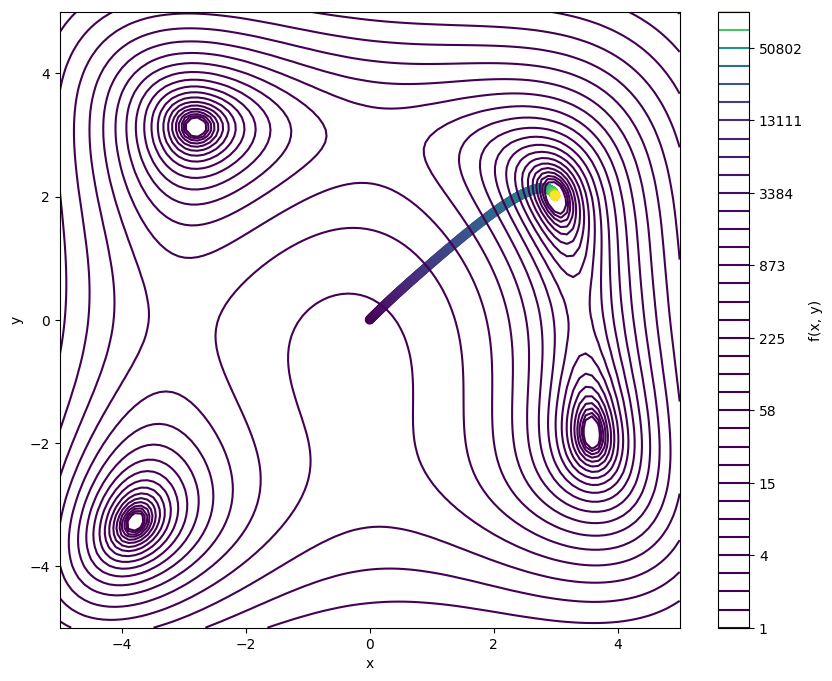

In [38]:
visualize.visualize_opt_trajectory(himmelblau, trajectory)

Text(0.5, 1.0, 'Loss over iterations')

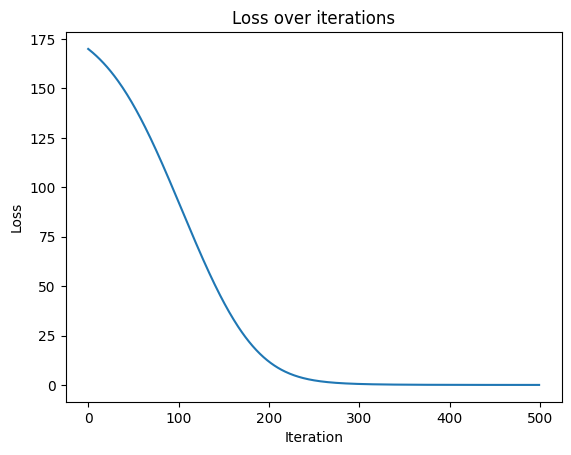

In [39]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over iterations")

<div class="alert alert-info">

__📝 Exercise__

Use gradient descent to find the minimum of the Rosenbrock function

$$
f(x, y) = (1 - x)^2 + 100(y - x^2)^2
$$

The exercise is solved if the value of the Rosenbrock function at the found minimum is smaller than $10^{-3}$.

</div>

Optimized parameters: [1.0000011 1.0000021]
Minimum value found: 1.1510792319313623e-12


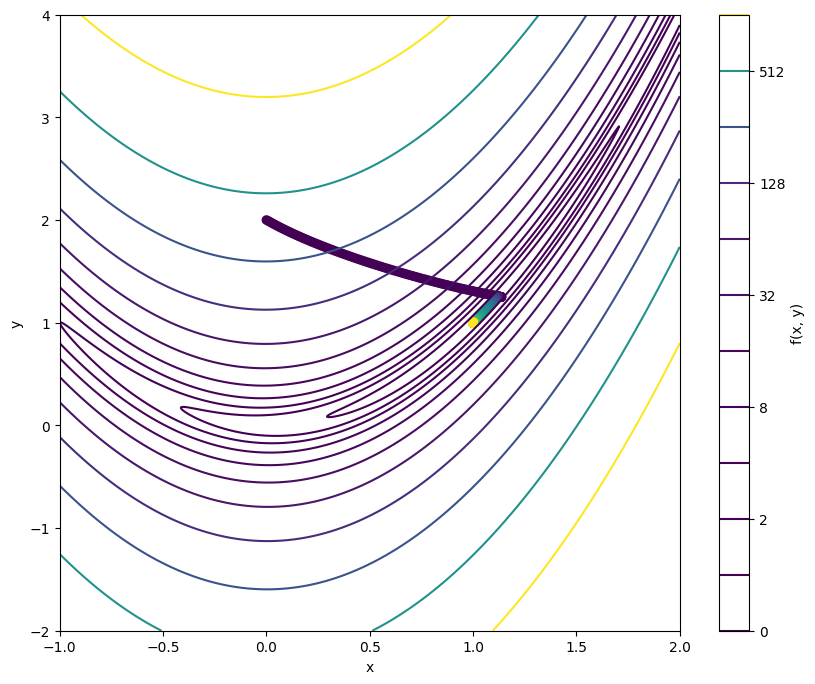

Verifying...
Test PASSED 

Expecting:
Value of function at minimum < 0.001

Received:
Value of function at minimum: 1.1510792319313623e-12



In [41]:
# --- Add your code here ---

xy_minumum = ...
# ---------------------------

marking.verify_rosenbrock_optimization(xy_minumum)

## Acoustic simulations using `jwave`

`jwave` is a library of simulators for acoustic applications. It is heavily inspired by [k-Wave](http://www.k-wave.org/)—a substantial portion of `jwave` is a port of k-Wave in JAX—and it's intended to be used as a collection of modular blocks that can be easily incorporated into any machine learning pipeline.

Embracing the philosophy of [JAX](https://jax.readthedocs.io/en/stable/), j-Wave is developed with the following principles in mind:

1. To be differentiable
2. To be efficient through `jit` compilation
3. To be easily run on GPUs
4. To be easily customizable

### A simple simulation using `jwave`

We will now learn the basic components needed to run a `jwave` simulation.

Similarly to k-Wave, j-Wave requires the user to specify a computational domain where the simulation takes place. This is done using the `Domain` [dataclass](https://docs.python.org/3/library/dataclasses.html).

The inputs for the constructor are the size of the domain in grid points in each spatial direction, and the corresponding discretization steps.

In [42]:
from jwave.geometry import Domain

N, dx = (128, 128), (0.1e-3, 0.1e-3)
domain = Domain(N, dx)

# Displaying the domain object
domain

Domain(N=(128, 128), dx=(0.0001, 0.0001))

The second ingredient for a simulation is the acoustic medium, defined using the `Medium` dataclass. In this example, the speed of sound has a background value of $1500m/s$ and a rectangular inclusion of $2000 m/s$, while the density has a constant value of 1000 $kg/m^3$. 

They are defined as part of the `Medium` dataclass, which also needs the computational domain as mandatory input argument.

In [43]:
from jwave.geometry import Medium

# Create the sound speed map
c0 = 1500 * jnp.ones(domain.N, dtype=jnp.float32)
c0 = c0.at[39:-39, 50:-30].set(2000.)

# Define the medium properties
medium = Medium(domain=domain, sound_speed=c0, density=1000., attenuation=0.0)
print(medium)

Medium[jaxdf.discretization.FourierSeries](
  domain=Domain(N=(128, 128), dx=(0.0001, 0.0001)),
  sound_speed=FourierSeries(
    params=f32[128,128,1],
    domain=Domain(N=(128, 128), dx=(0.0001, 0.0001))
  ),
  density=1000.0,
  attenuation=0.0,
  pml_size=20.0
)


Note that the sound speed is automatically defined as a `FourierSeries` field.

In [44]:
medium.sound_speed

FourierSeries(
  params=f32[128,128,1],
  domain=Domain(N=(128, 128), dx=(0.0001, 0.0001))
)

This is because, by default, `jwave` use Fourier spectral techniques to approximate spatial differential operators. For more information about this, check out the [`jaxdf` documentation](https://ucl-bug.github.io/jaxdf/index.html).

For now, all we need to remember is that to access the values of a `FourierSeries` object we can use the `.on_grid` method

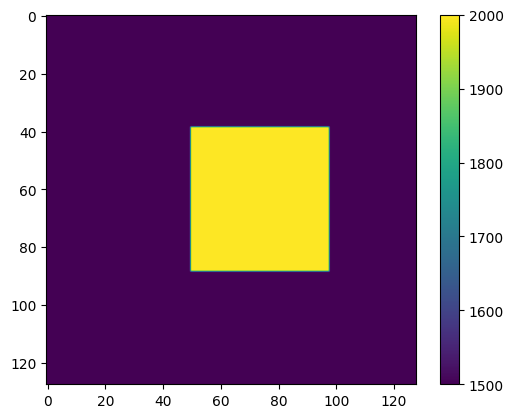

In [45]:
c0 = medium.sound_speed.on_grid
plt.imshow(c0)
plt.colorbar()

Lastly, simulations requires to define a `TimeAxis` object, which is used by the timestepping scheme of the numerical simulation. To ensure a stable simulation, this object can be constructed from the medium object for a given [CFL number](https://it.wikipedia.org/wiki/Condizione_di_Courant-Friedrichs-Lewy).

In [46]:
from jwave.geometry import TimeAxis

time_axis = TimeAxis.from_medium(medium, cfl=0.3)
print(time_axis.dt)

1.4999999464748726e-08


For this initial example, we will do an initial value problem that shows the evolution of an initial pressure distribution over time. 

Once again, the initial pressure distribution is a `Field`, therefore it must be somehow represented according to a [discretization](https://ucl-bug.github.io/jaxdf/notebooks/api_discretization.html). As metioned, most of the functions of `jwave` are tested using a `FourierSeries` discretization (i.e. spectral methods), so this is the one we will use to define the initial pressure field

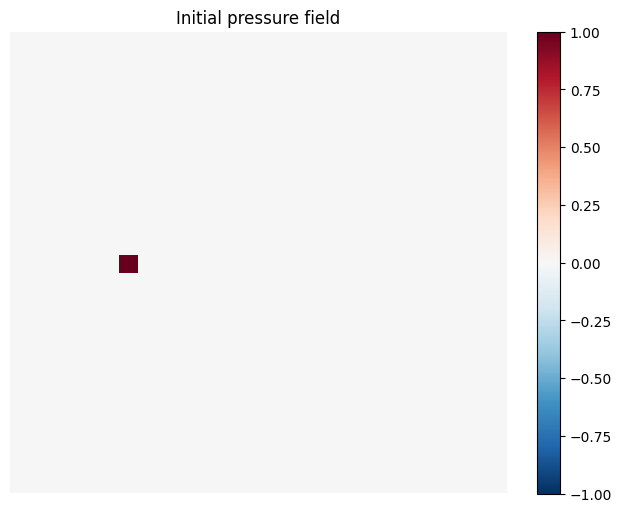

In [47]:
from jwave import FourierSeries
from jwave.geometry import circ_mask
from jwave.utils import show_field

p0_array = 1.0 * jnp.expand_dims(circ_mask(N, 3, (64, 30)), -1)
p0 = FourierSeries(p0_array, domain)

show_field(p0)
plt.title(f"Initial pressure field")
plt.show()

We can finally run the simulation, using the `simulate_wave_propagation` function. Note that this entire function can be `jit` compiled to run on your hardware (including GPUs)

In [48]:
from jax import jit
from jwave.acoustics import simulate_wave_propagation

@jit
def compiled_simulator(medium, p0):
    return simulate_wave_propagation(medium, time_axis, p0=p0)

In [49]:
pressure = compiled_simulator(medium, p0)

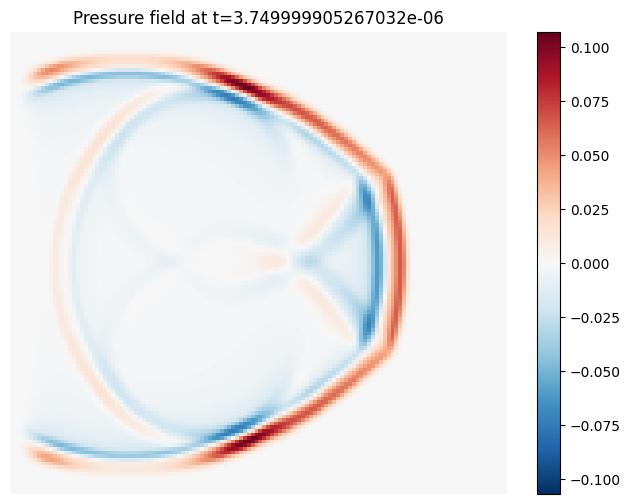

In [50]:
t = 250
show_field(pressure[t])
plt.title(f"Pressure field at t={time_axis.to_array()[t]}")
plt.show()

In [51]:
# Saving video
from jwave.extras.export import save_video
from IPython.display import HTML

save_video(pressure, 'sample_video.mp4', vmax=0.05, vmin=-0.05, fps=50)

Note that we can change the medium and reuse the entire simulation function

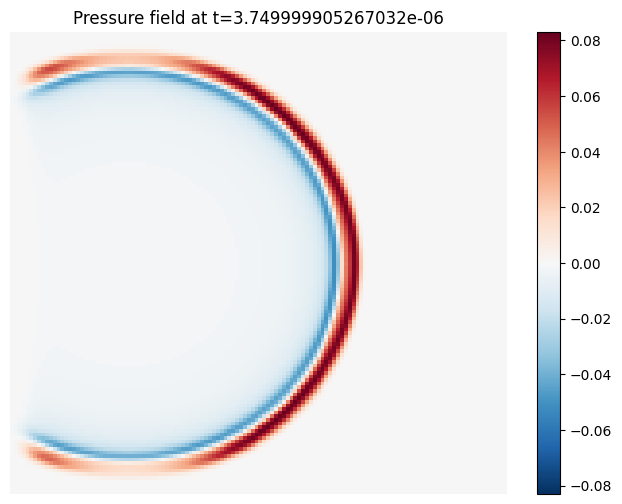

In [52]:
# Update medium
new_medium = Medium(domain=domain, sound_speed=1500., density=1000., attenuation=0.0)

# Run simulation
new_pressure = compiled_simulator(new_medium, p0)

# Show field
show_field(new_pressure[t])
plt.title(f"Pressure field at t={time_axis.to_array()[t]}")
plt.show()

<div class="alert alert-info">

__📝 Exercise__

Write the code to perform the following simulation on a 15x15mm domain

![image.png](images/sim_example.png)

Use a CFL of 0.2 and display the field at the $t=5ns$. You can make the half-circular inclusion and the source line (and thickness) of arbitrary size. Use 1000 $kg/m^3$ as density map.

Explore what happens as you change the various dimensions.

</div>

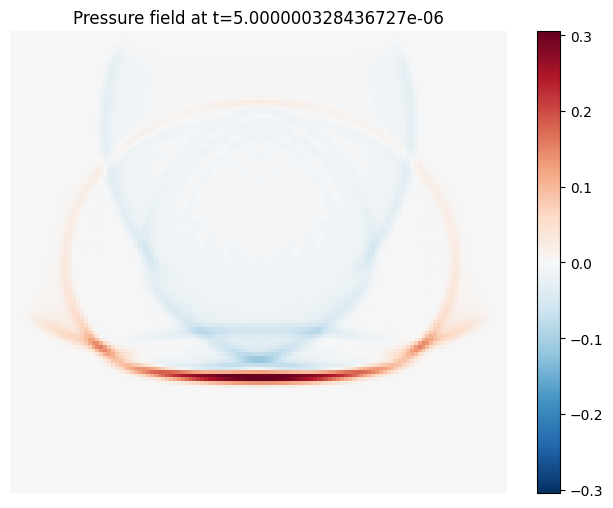

In [53]:
# --- Add your code here ---
...
# ---------------------------

### Time Harmonic simulations

`jwave` can also solve the time-harmonic acoustic propagation problem, which are governed by the Helmholtz equation.

The Helmholtz equation is given by Fourier transforming the wave equation in the temporal domain, which gives

$$
    \left(\nabla +\frac{\omega^2}{c^2}\right)\phi = i \omega S_M,
$$

with $P, S_M \in C^{2}(\mathbb{C})$. 

In `jwave`, the Helmholtz equation solved also takes into account heterogeneous absorption and density, and it is given as
$$
\left(\frac{\omega^2}{c_0^2} + \nabla^2  - \frac{1}{\rho_0} \nabla \rho_0 \cdot \nabla  + \frac{2i\omega^3\alpha_0}{c_0} \right)P = i \omega S_M
$$
where:
- $\omega =2\pi f_0$ is the angular frequency, and $f_0$ is the frequency of the wave
- $\rho_0$ is the material density
- $\alpha_0$ is the attenuation coefficient
- $S_M$ is the mass source term

Changing between time-varying and time-harmonic simulation can be done easily by just switching solver.

Note that the pressure map needs to be complex in this case!

In [54]:
from jwave.acoustics.time_harmonic import helmholtz_solver

# Defining frequency (2MHz)
omega = 2e6 * 2 * jnp.pi

# Making source map complex
src = p0 + 0j

# Solving the time domain problem
@jit
def solve_helmholtz(medium, src):
    return helmholtz_solver(medium, omega, src)

field = solve_helmholtz(medium, src)

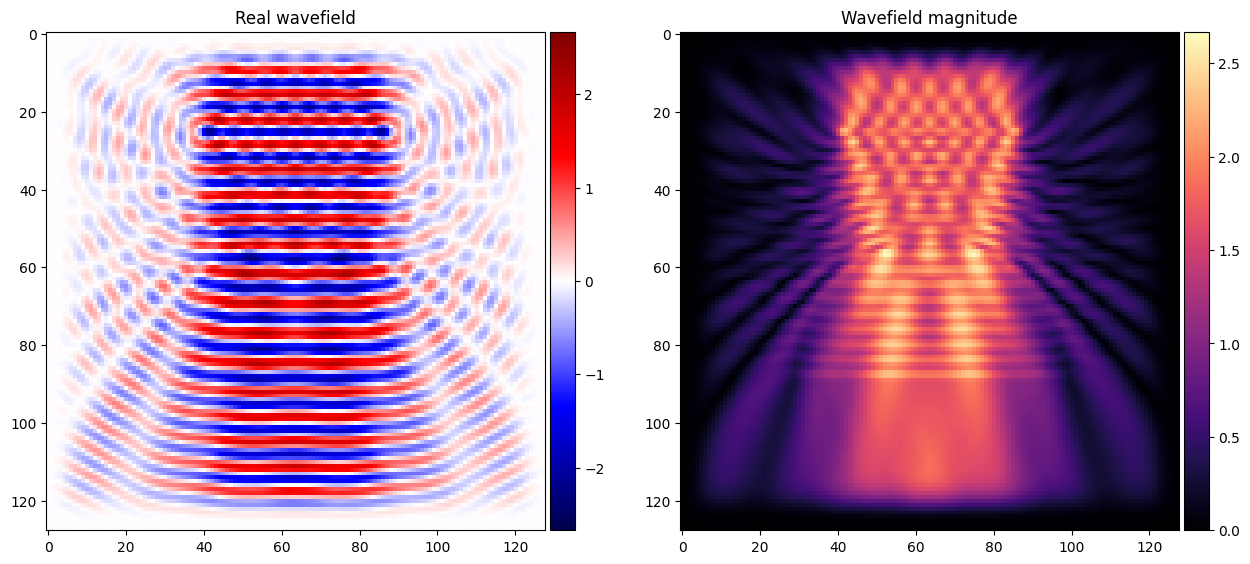

In [55]:
from jwave.utils import display_complex_field

_ = display_complex_field(field)

### Apply Automatic Differentiation to `jwave` simulations

One of the most powerful features of `jwave` is its seamless integration with JAX's automatic differentiation capabilities. This allows us to compute gradients of acoustic simulations with respect to various parameters, opening up a wide range of applications in optimization, inverse problems, and sensitivity analysis.

#### Why is Automatic Differentiation Useful in Acoustics?

Automatic differentiation in acoustic simulations enables us to:

1. Optimize transducer designs for specific acoustic fields
2. Solve inverse problems in acoustic imaging
3. Perform sensitivity analysis of acoustic fields to medium properties
4. Train machine learning models that incorporate acoustic physics

Let's explore how to apply automatic differentiation in `jwave` through a series of examples, each building on the last.

To warm up, we'll compute the gradient of the pressure field with respect to a global scaling factor of the sound speed.

In practice, we are treating the entire simulator as a function that we want to pass to `jax` autodiff capabilities. In this specific case, we are scaling the sound speed by a scaling factor $\alpha$. You can think about the entire simulator as a mapping from $\alpha$ to the pressure field:

$$
p = f(\alpha), \qquad f = \text{simulation function}
$$

The following code allows to find the gradient (or better, the Jacobian) of such function

$$
\frac{\partial p}{\partial \alpha}
$$

In [56]:
@jit
def solve_helmholtz(α, medium, src):
    # Scale the sound field
    c0 = α * medium.sound_speed

    new_medium = Medium(
        domain, 
        sound_speed = c0, 
        density = medium.density, 
        attenuation = medium.attenuation
    )
    
    return helmholtz_solver(new_medium, omega, src) 

dp = jax.jacfwd(solve_helmholtz)

grad_field = dp(1.0, medium, src)

Let's break this down:

1. We define a function `solve_helmholtz` that takes $\alpha$ as its first argument. This function scales the sound speed of the medium by this factor before solving the Helmholtz equation. This is our $f$.

2. We use `jax.jacfwd` to compute the Jacobian of this function with respect to its first argument $\alpha$. 

3. We evaluate this gradient at `α = 1.0`, which gives us the sensitivity of the pressure field to small changes in the overall sound speed.

The resulting `grad_field` is a complex-valued field that shows how the pressure at each point would change with a small increase in the sound speed. Positive real values indicate that the pressure amplitude would increase, while negative values indicate a decrease.

In [57]:
grad_field

FourierSeries(
  params=c64[128,128,1],
  domain=Domain(N=(128, 128), dx=(0.0001171875, 0.0001171875))
)

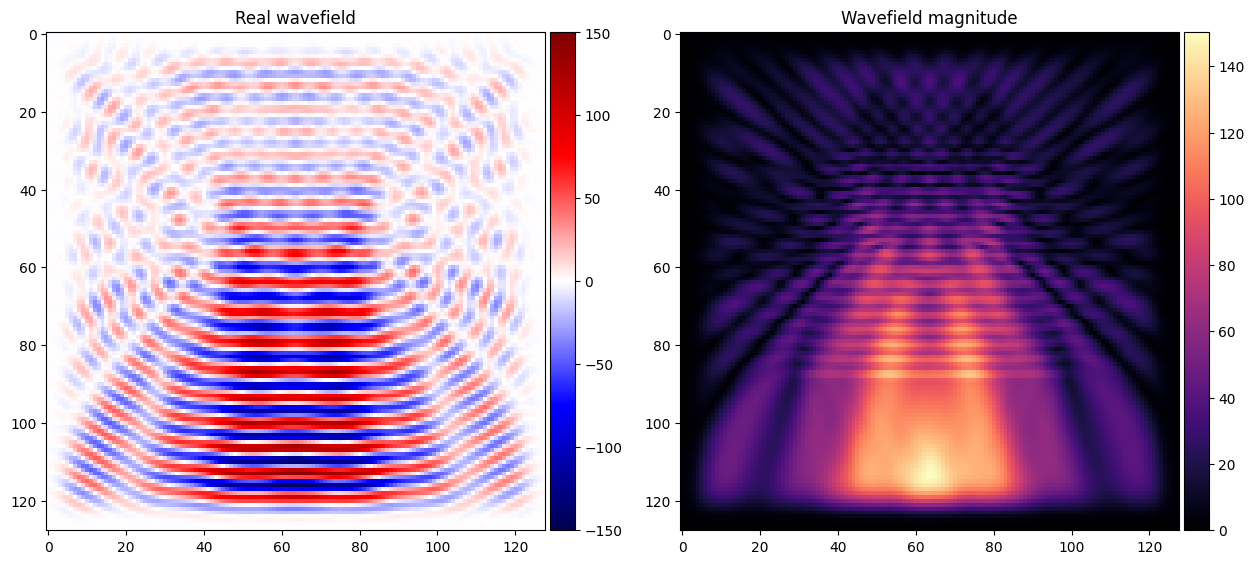

In [58]:
_ = display_complex_field(grad_field)

<div class="alert alert-info">

__📝 Exercise__

Assumee that the sound speed is parametrized as $c = \alpha c_0$. Find the gradient of the pressure field $\partial p / \partial \alpha$ of a time domain simulation and evaluate it at $t=5ns$.

For the other parameters, use the same setup as the previous exercise

</div>

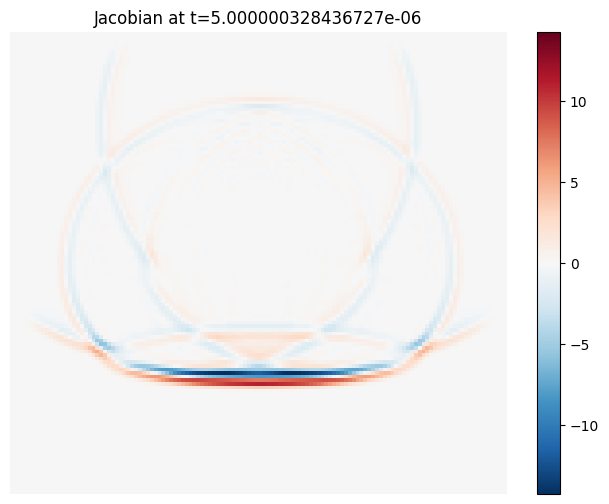

In [59]:
# --- Add your code here ---
...
# ---------------------------

### More examples

#### Gradient with Respect to Source Position

Now, let's consider a more complex example where we compute the gradient of the pressure field with respect to the position of a source. This could be useful for optimizing transducer placement.

First, let's define a function to create a localized source:

In [60]:
def sinc_2d(p, domain):
    xy = domain.grid
    x, y = xy[...,0], xy[...,1]
    val = jnp.sinc((p[0] - x)/domain.dx[0]) * jnp.sinc((p[1] - y)/domain.dx[1])

    # Make it localized
    R = jnp.linalg.norm(p - xy, axis=-1)
    val = val * (R < 1e-3)
    return FourierSeries(val, domain) + 0j

p0 = jnp.asarray([-4e-3, 1.3e-3])
src_point = sinc_2d(p0, domain)

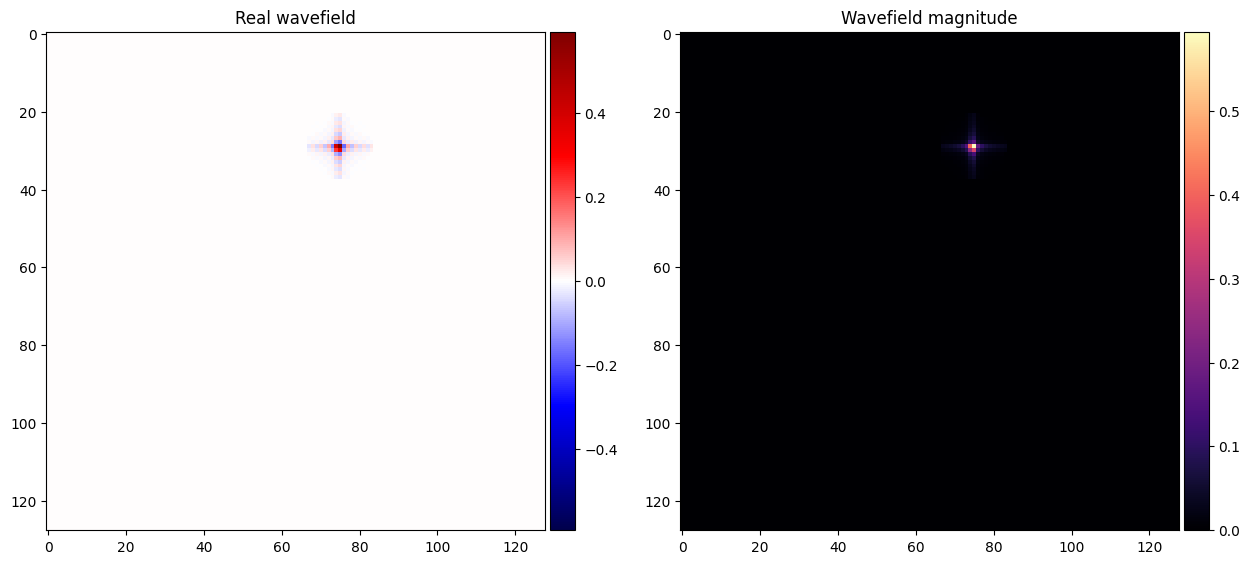

In [61]:
_ = display_complex_field(src_point)

This `sinc_2d` function creates a localized source at a given point `p` in the domain. The sinc function gives a smooth, band-limited representation of the source, and we multiply by a spatial window to ensure it's localized. We do need to have a continuous parametrized function of the variables that we want to optimize for, in order to have meaningful gradients.

Now, let's define our simulation function and compute its gradient:

In [62]:
@jit
def simulate_with_source(source_position, medium):
    src = sinc_2d(source_position, domain)
    return helmholtz_solver(medium, omega, src)

# Compute the gradient of the simulation with respect to source position
grad_wrt_position = jax.jacfwd(simulate_with_source)

# Evaluate the gradient at our initial source position
position_sensitivity = grad_wrt_position(p0, medium)

Here's what's happening:

1. We define `simulate_with_source`, which takes a `source_position` and creates a localized source at that position before solving the Helmholtz equation.

2. We use `jax.jacfwd` to compute the Jacobian of this function with respect to `source_position`. Since `source_position` is a 2D vector (x and y coordinates), the Jacobian will give us the sensitivity of the pressure field to changes in both x and y directions of the source.

3. We evaluate this Jacobian at our initial source position `p0`.

The resulting `position_sensitivity` is a tensor field. For each point in the domain, it gives a 2x2 matrix representing how the pressure at that point would change with small movements of the source in x and y directions.

Text(0.5, 1.0, 'Abs. sensitivity y axis')

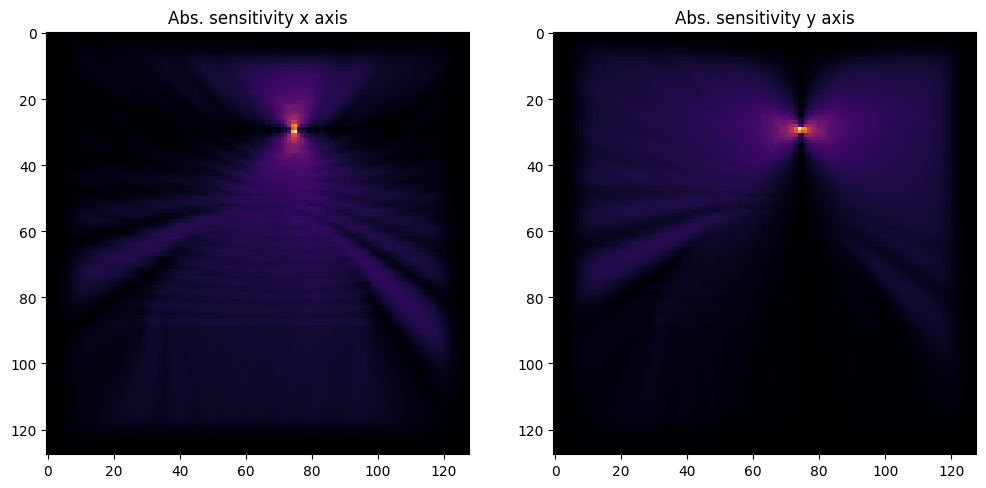

In [63]:
x_sensitivity = position_sensitivity.on_grid[...,0]
y_sensitivity = position_sensitivity.on_grid[...,1]

# Visualize sensitivity maps
fig, ax = plt.subplots(1, 2, figsize=(12,7))
ax.flatten()
ax[0].imshow(jnp.abs(x_sensitivity), cmap="inferno")
ax[0].set_title("Abs. sensitivity x axis")
ax[1].imshow(jnp.abs(y_sensitivity), cmap="inferno")
ax[1].set_title("Abs. sensitivity y axis")

#### Optimizing Source Positions for Maximum Pressure at a Target

Building on the previous example, let's use automatic differentiation to optimize the positions of multiple sources to maximize the pressure at a specific target point.

First, let's define a function to create a multi-source field:

In [64]:
def construct_source(pts, domain):
    src_maps = jax.vmap(sinc_2d, in_axes=(0,None))(pts, domain).on_grid
    src = jnp.sum(src_maps, axis=0)
    return FourierSeries(src, domain)

num_sources = 11
pts_x = jnp.asarray([-4e-3]*num_sources)
pts_y = jnp.linspace(-4e-3, 4e-3, num_sources)
pts = jnp.stack([pts_x, pts_y], axis=1)

src_map = construct_source(pts, domain)

This function creates multiple sources at the given positions and sums their contributions to get the total source map.

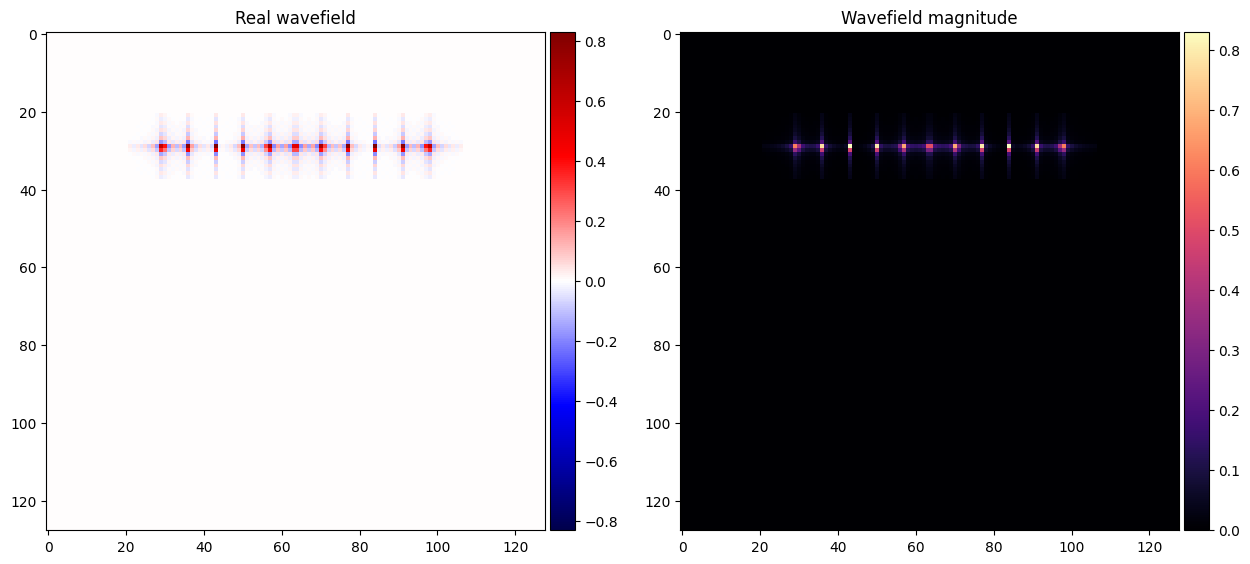

In [65]:
_ = display_complex_field(src_map)

Let's see how the field generated by such sources looks like

In [66]:
def solve_helmholtz(pts, src):
    src_map = construct_source(pts, domain)
    medium = Medium(domain, 1500., 1000., 0.0)
    return helmholtz_solver(medium, omega, src_map) 
    
pts0 = jnp.stack([pts_x, pts_y], axis=1)

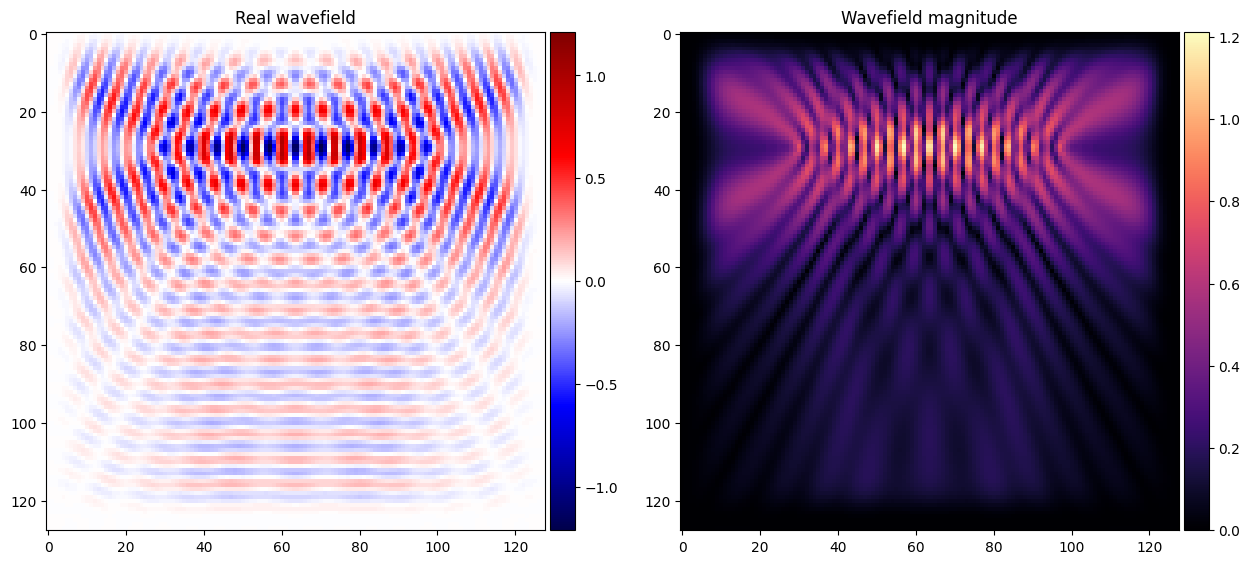

In [67]:
field = solve_helmholtz(pts0, src)
_ = display_complex_field(field)

Now, let's define our objective function and optimization procedure:

In [68]:
def target_amplitude(pts, src):
    field = solve_helmholtz(pts, src)
    field_at_target = jnp.abs(field.on_grid[100,80,0])
    return field_at_target 

# Set up optimizer
learning_rate = 0.00001
optimizer = optax.adam(learning_rate)

# Implement optimization step
@jax.jit
def optimization_step(params, opt_state, src):
    # Compute the loss and the gradients
    loss, grads = jax.value_and_grad(target_amplitude)(params, src)
    grads = -grads
    
    # Update the parameters
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    
    # Return the updated parameters, optimizer state, and loss
    return params, opt_state, loss

# Run optimization
num_steps = 20
pts = jnp.stack([pts_x, pts_y], axis=1)
opt_state = optimizer.init(pts)
losses = []

for n in range(num_steps):
    # Perform a single optimization step
    pts, opt_state, loss = optimization_step(pts, opt_state, src)

    print(f"Iteration {n}, amplitude: {loss}")

Iteration 0, amplitude: 0.14454273879528046
Iteration 1, amplitude: 0.18013134598731995
Iteration 2, amplitude: 0.22853147983551025
Iteration 3, amplitude: 0.2620469927787781
Iteration 4, amplitude: 0.29059720039367676
Iteration 5, amplitude: 0.3204120397567749
Iteration 6, amplitude: 0.3459017276763916
Iteration 7, amplitude: 0.36869481205940247
Iteration 8, amplitude: 0.3911813795566559
Iteration 9, amplitude: 0.40711262822151184
Iteration 10, amplitude: 0.4257776141166687
Iteration 11, amplitude: 0.4429587423801422
Iteration 12, amplitude: 0.45458513498306274
Iteration 13, amplitude: 0.4655277132987976
Iteration 14, amplitude: 0.4754714369773865
Iteration 15, amplitude: 0.4820467531681061
Iteration 16, amplitude: 0.48707911372184753
Iteration 17, amplitude: 0.4889058768749237
Iteration 18, amplitude: 0.4903052747249603
Iteration 19, amplitude: 0.49267563223838806


Let's break down what's happening here:

1. We define `target_amplitude`, which computes the amplitude of the pressure field at a specific target point (here, at grid coordinates [100, 80]).

2. We set up an Adam optimizer from the `optax` library, which is compatible with JAX's automatic differentiation.

3. In `optimization_step`, we use `jax.value_and_grad` to compute both the target amplitude and its gradient with respect to the source positions. We negate the gradients because we want to maximize the amplitude, not minimize it.

4. We run the optimization for 20 steps, updating the source positions at each step to increase the pressure amplitude at the target point.

This optimization procedure automatically computes the gradients of the entire acoustic simulation with respect to the source positions and uses these gradients to iteratively improve the source configuration.

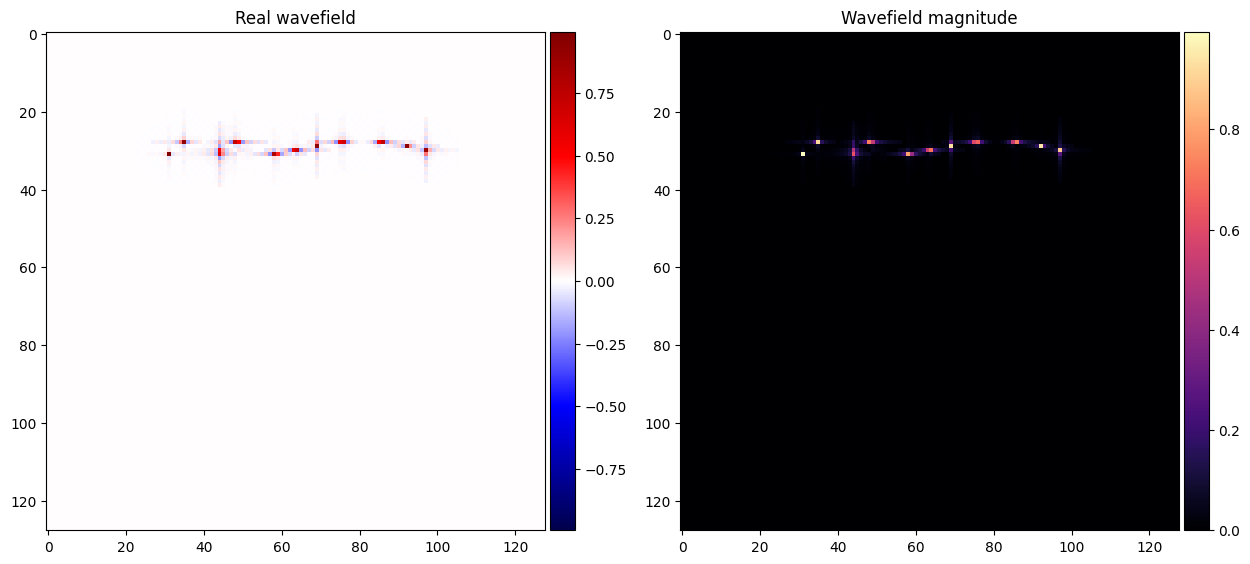

In [69]:
src_map = construct_source(pts, domain)
_ = display_complex_field(src_map)

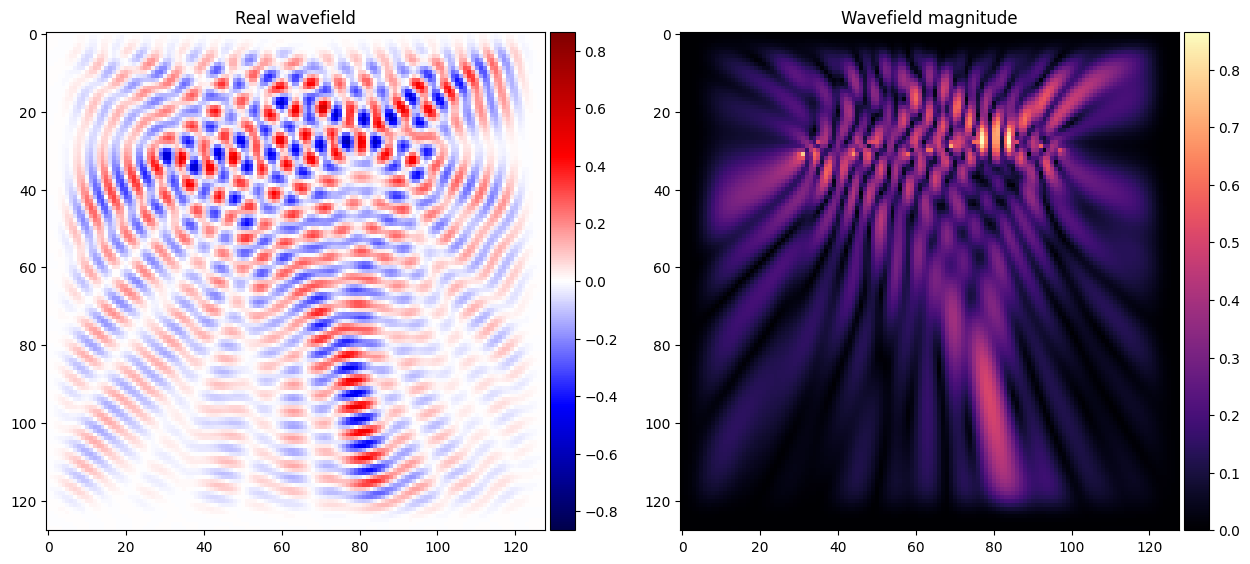

In [70]:
field = solve_helmholtz(pts, src)
_ = display_complex_field(field)

#### Linear uncertainty propagation

For a fixed problem (for example, a particular transducer and density map), the simulated acoustic pressure field $p$ can be written as a function of the parameter vector $\mathbf \theta$

$$
p = f(\theta)
$$

Here, $f$ includes the wave simulation, and any other pre or post processing steps needed to generate the output pressure field.

Assume now that there's an uncertainty on the parameter $\theta$, that is

$$
\theta =  \theta_0 + \varepsilon
$$

with $\varepsilon \sim \mathcal{N}(0,\sigma_\theta^2)$.

It might be of interest to ask what is the uncertainty associated with the output of the simulation given the uncertainty of the input parameters. If $\sigma_\theta$ is sufficiently small, one way to do so is to expand $f$ as a Taylor series up to second order

$$
f (\theta) \approx f(\theta_0) + \frac{\partial f}{\partial \theta}(\theta - \theta_0)
$$

In this case, the variance of the output of the simulation is simply given by 

$$
\text{Var}(f) = \sigma_\theta^2 \left|\frac{\partial f}{\partial \theta}\right|^2
$$

<div class="alert alert-info">

__📝 Exercise__

Find the approximate standard deviation map for the wavefield amplitude generated by the previous example, if the inclusion sound speed $c_0$ has a mean value of $1800 m/s$ and a standard deviation $\sigma_c = 50m/s$. Use the optimized transducers positions.

</div>

In [71]:
# --- Add your code here ---
...
# ---------------------------

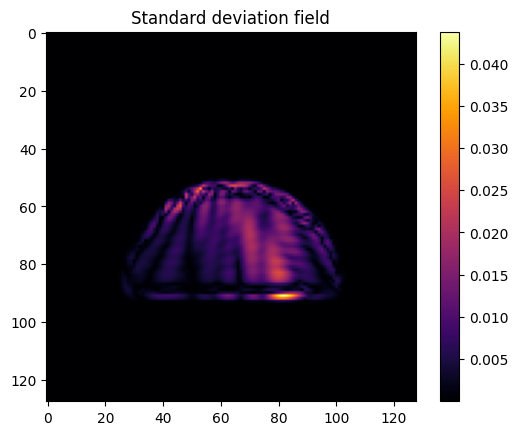

In [72]:
plt.imshow(std_field, cmap="inferno")
plt.title("Standard deviation field")
plt.colorbar()

### Conclusions

These examples demonstrate the power and flexibility of automatic differentiation in `jwave`. By leveraging JAX's AD capabilities, we can easily compute gradients of complex acoustic simulations with respect to various parameters. This opens up a wide range of possibilities for acoustic design optimization, inverse problems, and integration with machine learning models.

Some potential applications of this technology include:

1. Optimizing transducer array designs for focused ultrasound therapy
2. Inverse problem solving in ultrasound imaging
3. Sensitivity analysis for acoustic cloaking designs
4. Training physics-informed neural networks for acoustic problems

As you become more comfortable with `jwave` and automatic differentiation, you can explore even more complex scenarios, such as using nested optimization loops, making multi-physics simulations or solving inverse problems in acoustic tomography.